# Generate Data for Robust Regressions
https://machinelearningmastery.com/robust-regression-for-machine-learning-in-python/

## Create a regression dataset with outliers

In [1]:
from random import random, randint, seed

from sklearn.datasets import make_regression

from matplotlib import pyplot

In [2]:
# Prepare the dataset
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=1,
                           tail_strength=0.9, effective_rank=1,
                           n_informative=1, noise=3,
                           bias=50, random_state=1)
    # Add artificial outliers
    seed(1)
    for i in range(10):
        factor = randint(2, 4)
        if random() > 0.5:
            X[i] += factor * X.std()
        else:
            X[i] -= factor * X.std()

    return X, y

## Compare Regressions

In [3]:
from numpy import arange, mean, std, absolute

from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [4]:
# Dictionary of model names and model objects
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models

In [5]:
# Evaluate a model
def evaluate_model(X, y, model):
    # Define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
    # Force scores to be positive
    return absolute(scores)

In [6]:
# Generate dataset
X, y = get_dataset()

In [7]:
# Retrieve models
models = get_models()
results = dict()
for name, model in models.items():
    # Evaluate the model
    results[name] = evaluate_model(X, y, model)
    # Summarize progress
    print(f'> {name} {mean(results[name])} ({std(results[name])})')

> Linear 5.260342552122636 (1.1486679656152237)
> Huber 4.434727563180386 (1.8678183729099374)
> RANSAC 4.415385606181739 (2.16863481889508)
> TheilSen 4.371390239937131 (1.9609733695261808)


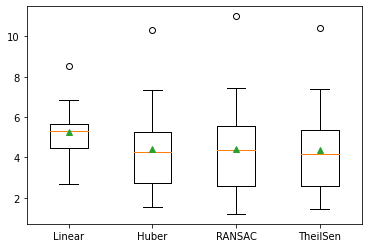

In [8]:
# Plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()

In [9]:
# Plot the dataset and the model's line of best fit
def plot_best_fit(X, y, xaxis, model):
    # Fit the model to all data
    model.fit(X, y)
    # Calculate outputs for the grid across the domain
    yaxis = model.predict(xaxis.reshape((len(xaxis),1)))
    # Plot the line of the best fit
    pyplot.plot(xaxis, yaxis, label=type(model).__name__)

In [10]:
# Define a unifor grid across the input domain
xaxis = arange(X.min(), X.max(), 0.01)

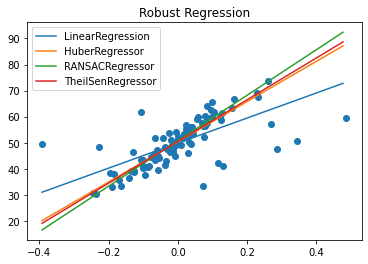

In [11]:
for _, model in get_models().items():
    # Plot the line of the best fit
    plot_best_fit(X, y, xaxis, model)
# Plot the dataset
pyplot.scatter(X, y)
# Show the plot
pyplot.title('Robust Regression')
pyplot.legend()
pyplot.show()